In [1]:
install.packages("MASS")
library("MASS")
install.packages("missMDA")
library("missMDA")
install.packages("tidyverse")
library("tidyverse")
install.packages("caret")
library("caret")

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'MASS' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'MASS'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\2198K\Documents\R\win-library\3.6\00LOCK\MASS\libs\x64\MASS.dll to C:\Users\2198K\Documents\R\win-library\3.6\MASS\libs\x64\MASS.dll: Permission denied"
Warning message:
"restored 'MASS'"



The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpUtCIBf\downloaded_packages


Warning message:
"package 'MASS' was built under R version 3.6.2"
Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'missMDA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpUtCIBf\downloaded_packages


Warning message:
"package 'missMDA' was built under R version 3.6.2"
Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpUtCIBf\downloaded_packages


Warning message:
"package 'tidyverse' was built under R version 3.6.2"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

Warning message:
"package 'tidyr' was built under R version 3.6.2"
Warning message:
"package 'readr' was built under R version 3.6.2"
Warning message:
"package 'dplyr' was built under R version 3.6.2"
Warning message:
"package 'forcats' was built under R version 3.6.2"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x dplyr::select() masks MASS::select()

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caret'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\2198K\Documents\R\win-library\3.6\00LOCK\caret\libs\x64\caret.dll to C:\Users\2198K\Documents\R\win-library\3.6\caret\libs\x64\caret.dll: Permission denied"
Warning message:
"restored 'caret'"



The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpUtCIBf\downloaded_packages


Warning message:
"package 'caret' was built under R version 3.6.2"
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift




In [3]:
ionomics <- read.csv('New_ionStats_Z.csv',colClasses =c("NULL","NULL",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
                                                                    NA,NA,NA,NA,NA,NA,NA))
ionomics <- imputePCA(ionomics, method = "Regularized")

In [4]:
# Split the data into training (80%) and test set (20%)
set.seed(123)
training.samples <- ionomics$completeObs[,2] %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data <- ionomics$completeObs[training.samples, ]
test.data <- ionomics$completeObs[-training.samples, ]
train.data <- unlist(test.data)
test.data <- unlist(test.data)
train.data <- as.data.frame(train.data)
test.data <- as.data.frame(test.data)

In [5]:
# Fit the model
model <- lda(Spec_int~., data = train.data)
# Make predictions
predictions <- model %>% predict(test.data)
# Model accuracy
mean(predictions$class==test.data$Spec_int)
model

[1] 0.9878049

Call:
lda(Spec_int ~ ., data = train.data)

Prior probabilities of groups:
         1          2          3          4          5          6          7 
0.04878049 0.01219512 0.09756098 0.04878049 0.02439024 0.12195122 0.06097561 
         8          9 
0.03658537 0.54878049 

Group means:
         B11        Na23        Mg26        Al27        P31        S34
1  0.9252887  2.24808562  1.20480452  0.94131948  0.3282980  0.3090523
2  0.8044517 -0.40215018  0.16594867  0.30002823 -0.3629934  0.1341872
3  0.7045938  0.54756168  0.53255436  1.08677263  1.2742867  1.5394044
4  0.7491258  0.61430507  1.20714124  1.22394796  0.1354277  1.0094879
5  0.3323375  0.92633307  0.08479488  0.19332558  1.8223159  0.7094069
6  1.2644006  1.19811978 -0.27948334  0.67669318  0.8119436  0.7928098
7  1.5678847  0.63640218  0.27439915  0.09316363  0.7341459  0.5712404
8  0.4321229  0.07088199 -0.45677704  0.45985760  0.3567910  0.1425658
9 -0.8002667 -0.65178531 -0.55696660 -0.66093041 -0.5776478 -0.7150879

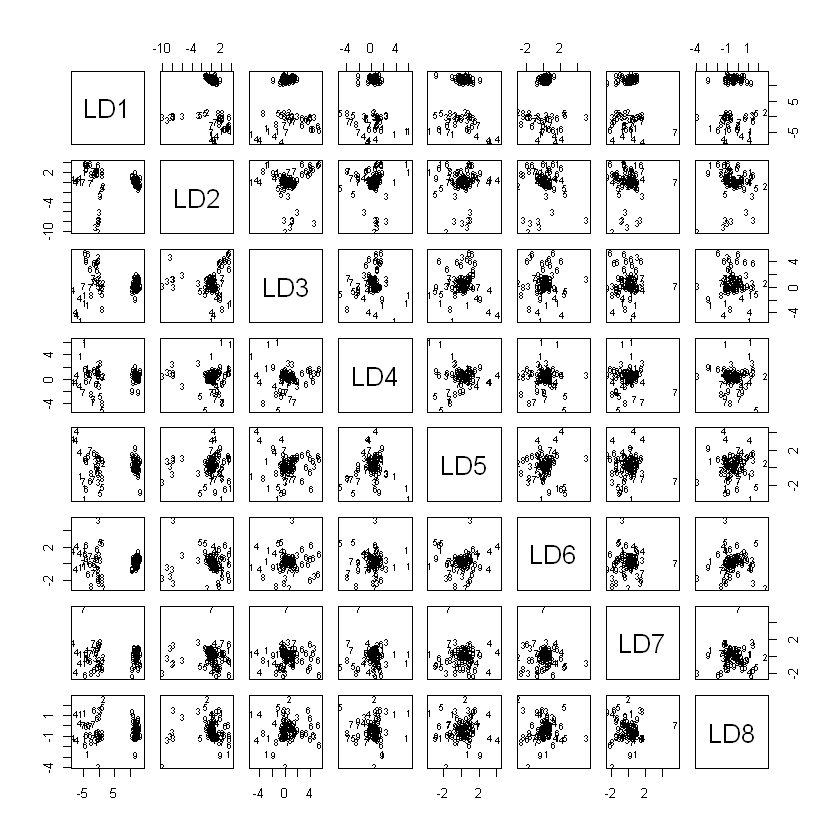

In [6]:
plot(model)

In [7]:
# Predicted classes
head(predictions$class, 6)
# Predicted probabilities of class memebership.
head(predictions$posterior, 6) 
# Linear discriminants
head(predictions$x, 3) 

[1] 1 1 1 1 2 3
Levels: 1 2 3 4 5 6 7 8 9

,1,2,3,4,5,6,7,8,9
1,9.999999e-01,5.629493e-22,4.743949e-28,1.018312e-07,3.809965e-28,7.383852e-23,4.593926e-16,7.163914e-18,3.841025e-76
2,9.999120e-01,2.760348e-18,1.215674e-29,6.626216e-05,2.385650e-21,1.620952e-08,2.039608e-05,1.331311e-06,3.850442e-56
3,1.000000e+00,3.324024e-21,1.048822e-31,6.900047e-20,7.356382e-32,2.384451e-14,4.703166e-17,3.137894e-21,3.231235e-69
4,1.000000e+00,9.678322e-30,3.133761e-40,1.306322e-17,6.791761e-34,2.288768e-16,1.166435e-19,1.192312e-21,1.997490e-71
5,1.345408e-21,1.000000e+00,3.202368e-14,1.101248e-26,1.655111e-15,5.631646e-12,7.685528e-10,3.405123e-08,6.536046e-28
6,1.824769e-34,4.911537e-24,1.000000e+00,4.963562e-29,3.450740e-13,1.160555e-25,6.973736e-22,6.092814e-30,1.524043e-45


,LD1,LD2,LD3,LD4,LD5,LD6,LD7,LD8
1,-11.467475,0.1106946,-5.776073,3.408338,-1.1450930,-0.5427773,0.3262737,1.523978
2,-9.401714,3.5136754,-3.379468,1.431524,0.5989673,0.1619740,0.7766589,-2.293703
3,-10.261177,2.1164758,-1.681662,5.695901,-3.7436820,-0.4302952,0.2952680,1.603068
